## ME40: Dimensional & Data Analyses in Engineering
### HW 7 - Wednesday December 3rd, 2025
#### Marissa Till

### Problem 3 - Fourier Series in MATLAB (practice)
##### (This was done in Python rather than MATLAB)

Time to compute some Fourier coefficients and Fourier series in MATLAB. Only attempt this problem AFTER finishing Problem 2.

Let’s consider the function $𝑓(𝑡) = \frac1 {2−cos 𝑡}$ periodic over a period 𝜏 = 2𝜋. This is Example 1 from slide 160.

1. Evaluate the function 𝑓 over the interval [0,2𝜋] using 𝑁 = 100 points.

   Note: As seen in lectures, the last evaluation, 𝑓$_𝑁$, is not at 𝑡 = 𝜏.
2. Compute the Fourier coefficients 𝑓$_𝑘$. Plot their modulus versus the absolute value of 𝑘 using a log-lin plot. Explain the trend that you see.

   Note: the trend is perfect…
Now, we want to plot some truncated Fourier series and see how well they approximate the full Fourier Series.

3. Compute the truncated series with |𝑘| = 0, |𝑘| ≤ 1, and |𝑘| ≤ 2.

4. Plot these three truncated series along with the full Fourier series and the original function versus time. Explain the trends you see.

   Note: for clarity, and just this once, use symbols for the original function.

The discrete version of Parseval theorem can be used to estimate how much of the variance of a time signal is captured by the various Fourier modes. We will consider the 𝑁 evaluations of the function 𝑓 as a set of 𝑁 samples.

5. Define the mean of the sample set and evaluate it numerically. Compare it to the 𝑓$_0$ value.

6. Define the variance of the sample set and evaluate it numerically.

7. Express the variance of the sample set in terms of the Fourier coefficients. Evaluate the fraction of the total variance captured by the truncated series with |𝑘| ≤ 1 and |𝑘| ≤ 2.

In [1]:
# === Import Required Packages ===
import numpy as np
import matplotlib.pyplot as plt

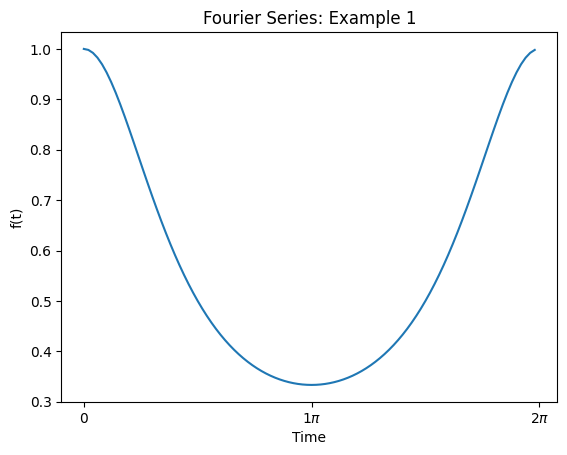

In [2]:
# === 1. Evaluate the function 𝑓 over the interval [0,2𝜋] using 𝑁 = 100 points.

N = 100

time = np.linspace(0, 2 * np.pi, N + 1)
t = time[0:N]

f_t = 1 / (2 - np.cos(t))

plt.figure()
plt.plot(t, f_t)
formatter = plt.FuncFormatter(lambda val, pos: r'${:.0g}\pi$'.format(val / np.pi) \
                              if val != 0 else '0')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(base=np.pi))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Fourier Series: Example 1')
plt.xlabel('Time')
plt.ylabel('f(t)')
plt.show()

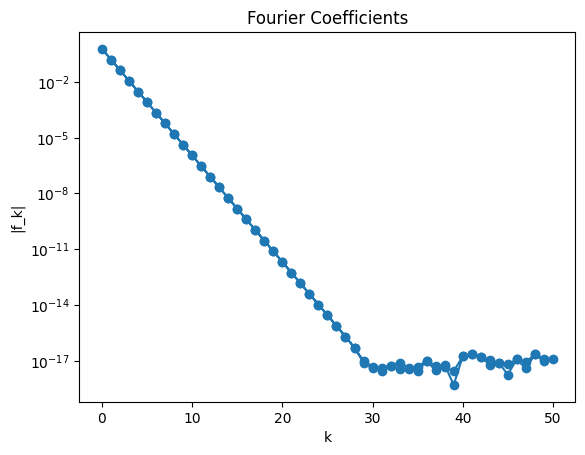

In [3]:
# === 2. Compute the Fourier coefficients 𝑓_k.

k = np.arange(-N/2, N/2)
fk = np.fft.fftshift(np.fft.fft(f_t)) / N

# Plot their modulus versus the absolute value of 𝑘 using a log-lin plot.
plt.figure()
plt.semilogy(abs(k), abs(fk), marker='o')
plt.title('Fourier Coefficients')
plt.xlabel('k')
plt.ylabel('|f_k|')
plt.show()

There are large coefficients near k = 0 and then a rapid exponential decay. This is because f is infinitely smooth (all derivatives exist). Most of the energy is in the low k modes. The k modes above 30 are capturing numerical noise at the Nyquist limit.

In [4]:
# === 3. Compute the truncated series with |𝑘| = 0, |𝑘| ≤ 1, and |𝑘| ≤ 2 ===

center = int(N / 2)

def truncated_fk(fk_shifted, k_max):
    """
    Return a shifted coefficient array that keeps only |k| <= Kmax
    fk_shifted is assumed to be fftshifted (zero at index `center`)
    """
    out = np.zeros_like(fk_shifted)
    # keep k=0
    out[center] = fk_shifted[center]
    for k in range(1, k_max+1):
        out[center + k] = fk_shifted[center + k]   # +k (positive freq)
        out[center - k] = fk_shifted[center - k]   # -k (negative freq)
    return out

# Build truncated coefficient arrays
fkN = fk.copy()             # full series (all k)
fk0 = truncated_fk(fk, 0)   # |k| = 0
fk1 = truncated_fk(fk, 1)   # |k| <= 1
fk2 = truncated_fk(fk, 2)   # |k| <= 2

# Inverse transform to get reconstructed time signals
fN = np.fft.ifft(np.fft.ifftshift(fkN)) * N
f0 = np.fft.ifft(np.fft.ifftshift(fk0)) * N
f1 = np.fft.ifft(np.fft.ifftshift(fk1)) * N
f2 = np.fft.ifft(np.fft.ifftshift(fk2)) * N

# Take real part of complex results
fN = np.real(fN)
f0 = np.real(f0)
f1 = np.real(f1)
f2 = np.real(f2)

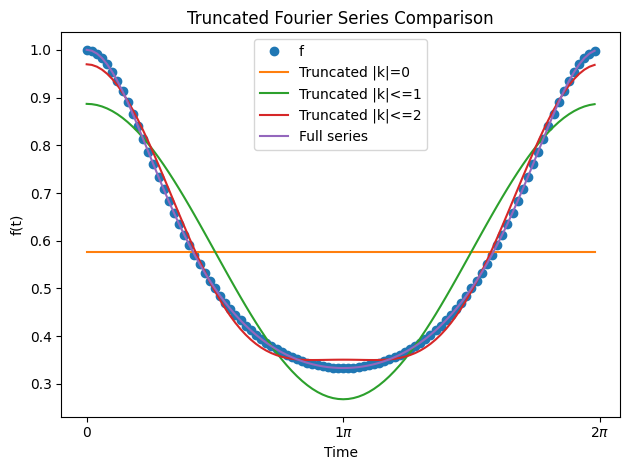

In [5]:
# === 4. Plot ===
# Three truncated series along with the full Fourier series & original function vs. time
plt.figure()
plt.plot(t, f_t, 'o', label='f')
plt.plot(t, f0, label='Truncated |k|=0')
plt.plot(t, f1, label='Truncated |k|<=1')
plt.plot(t, f2, label='Truncated |k|<=2')
plt.plot(t, fN, label='Full series')
formatter = plt.FuncFormatter(lambda val, pos: r'${:.0g}\pi$'.format(val / np.pi) \
                              if val != 0 else '0')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(base=np.pi))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Truncated Fourier Series Comparison')
plt.xlabel('Time')
plt.ylabel('f(t)')
plt.legend()
plt.tight_layout()
plt.show()

The full series matches the function as expected. Truncating to k=0 seems to be the constant mean component. Very quickly, with adding each mode, the truncated series reconstruction converges towards the full Fourier series. The truncation removes the fine/high-frequency detail, and it can be seen that most of the energy is captured in the first few k values.

In [6]:
# === 5. Define the mean of the sample set ===

# Sum of f_t samples divided by number of samples
mean = np.sum(f_t)/N
print(f"Mean from Data: {np.real(mean):.4f}")

# Values of fk in the middle of the samples
f_k_mean = fk[int(N/2)]
print(f"Mean from Fourier Coefficients: {np.real(f_k_mean):.4f}")

# Any value of f_0
print(f"𝑓_0 value: {np.mean(f0):.4f}")  # Constant value, f0[0] yields same result

print("\nAll values are the same, and the f0 truncation is the constant mean component.")

Mean from Data: 0.5774
Mean from Fourier Coefficients: 0.5774
𝑓_0 value: 0.5774

All values are the same, and the f0 truncation is the constant mean component.


In [7]:
# === 6. Define the variance of the sample set ===

# Statistical Variance (removing the mean)
# Mean of samples squared subtracted from (sum of values squared / number of samples)
var = np.sum(np.abs(f_t)**2) / N - mean**2
print(f"Variance from Data: {np.real(var):.4f}")

Variance from Data: 0.0516


In [8]:
# === 7. Express the variance of the sample set in terms of the Fourier coefficients ===

var_coef = np.sum(np.abs(fk)**2) - np.abs(fk[center])**2
print(f"Variance from Fourier Coefficients: {np.real(var_coef):.4f}")

# Evaluate the fraction of the total variance captured by the truncated series
var1_frac = (np.sum(np.abs(fk1)**2) - np.abs(fk1[center])**2) / var_coef
var2_frac = (np.sum(np.abs(fk2)**2) - np.abs(fk2[center])**2) / var_coef

print(f"|𝑘| ≤ 1 Variance Fraction: {np.real(var1_frac):.4f} "
      f"({(np.real(var1_frac) * 100):.3f}%)")
print(f"|𝑘| ≤ 2 Variance Fraction: {np.real(var2_frac):.4f} "
      f"({(np.real(var2_frac) * 100):.3f}%)")

Variance from Fourier Coefficients: 0.0516
|𝑘| ≤ 1 Variance Fraction: 0.9282 (92.820%)
|𝑘| ≤ 2 Variance Fraction: 0.9948 (99.485%)
